## TASK -1 

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading dataset
df=pd.read_csv('titanic_dataset.csv')

In [3]:
# to get insights about dataset
print(df.head(5))

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [4]:
#what data types columns are having
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
# to get an overall idea about null values and all
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [6]:
total_rows=df['PassengerId'].count()
print("Percentage of Missing value per column:")
print((1-df.count()/total_rows)*100)

Percentage of Missing value per column:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


### Handling Missing Values

In [7]:
# Around 78 percent data missing for Cabin feature we can simply drop it
df.drop(['Cabin'],axis=1,inplace=True)

In [8]:
mean_value=df['Age'].mean()
df['Age'].fillna(value=mean_value,inplace=True)

In [9]:
mean_value=df['Fare'].mean()
df['Fare'].fillna(value=mean_value,inplace=True)

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB
None


In [11]:
df.duplicated() # No duplicates present

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

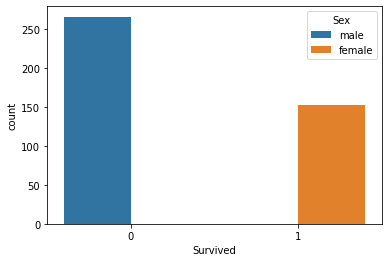

In [12]:
# If Survived then 1 else 0
#Lets Check survived as per Sex
sns.countplot(x='Survived',hue='Sex',data=df)
plt.show()

#### The above plot shows that all the females survived and men did not. It seems odd lets check it

In [13]:
print(df[['Sex','Survived']])

        Sex  Survived
0      male         0
1    female         1
2      male         0
3      male         0
4    female         1
..      ...       ...
413    male         0
414  female         1
415    male         0
416    male         0
417    male         0

[418 rows x 2 columns]


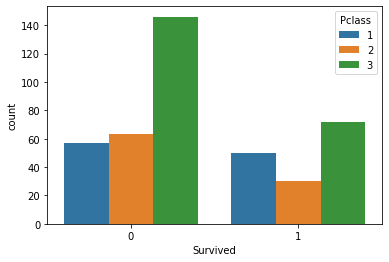

In [14]:
# Let's check Survived by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.show()

#### No clear pattern has been found from the  above plot as it shows maximum people that survived were in class 3 at the same time maximum who did not they were also in class 3 . So till now the only observation that we got is if the Sex is female then survived else not

In [15]:
df['Pclass'].replace(1,'Class 1',inplace=True)
df['Pclass'].replace(2,'Class 2',inplace=True)
df['Pclass'].replace(3,'Class 3',inplace=True)

In [19]:

df['Embarked'].replace('C','Cherbourg',inplace=True)
df['Embarked'].replace('Q','Queenstown',inplace=True)
df['Embarked'].replace('S','Southampton',inplace=True)

In [20]:
# Converting categorical into numeric
NSex=pd.get_dummies(df['Sex'],drop_first=True)
NPclass=pd.get_dummies(df['Pclass'],drop_first=True)
NEmbarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [21]:
df=pd.concat([df,NSex,NPclass,NEmbarked],axis=1)

In [22]:
# dropping columns that are not necessary
df.drop(['PassengerId','Sex','Pclass','Embarked','Ticket','Name'],axis=1,inplace=True)

In [23]:
print(df.head())

   Survived   Age  SibSp  Parch     Fare  male  Class 2  Class 3  Queenstown  \
0         0  34.5      0      0   7.8292     1        0        1           1   
1         1  47.0      1      0   7.0000     0        0        1           0   
2         0  62.0      0      0   9.6875     1        1        0           1   
3         0  27.0      0      0   8.6625     1        0        1           0   
4         1  22.0      1      1  12.2875     0        0        1           0   

   Southampton  
0            0  
1            1  
2            0  
3            1  
4            1  


In [24]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [28]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

C:\Users\Sahil Sran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
predictions=lg.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        49

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [33]:
accuracy=accuracy_score(y_test,predictions)
print(accuracy)

1.0


In [35]:
cm=confusion_matrix(y_test,predictions)
print(cm)

[[77  0]
 [ 0 49]]


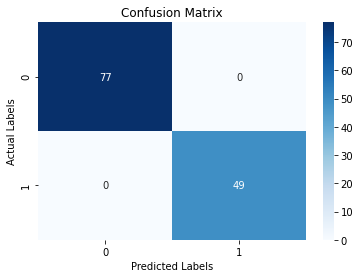

In [37]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()